<a href="https://colab.research.google.com/github/Meera-Ajay-25/Machine-Learning-projects/blob/main/Targeting_of_advertisments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 3: **Effective targeting of Advertisments**

Algorithm Used: **K Nearest Neighbors, Support Vector Machine, Naive Bayes**

Steps:

*   Loading the dataset using pandas library

*   preprocessing the dataset.

*   Splitting the dataset.

*   Exploratory Data Analysis

*   Model building using K Nearest Neighbors, Support Vector Machine, Naive Bayes


*   Model testing using Classification Report and Confusion Matrix











In [1]:
#Loading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/advertising_ef.csv")
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,NaN,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0
...,...,...,...,...,...,...,...,...,...,...
1004,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,Male,Lebanon,11-02-2016 21:49,1
1005,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,Male,Bosnia and Herzegovina,22-04-2016 02:07,1
1006,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,Male,Mongolia,01-02-2016 17:24,1
1007,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,Female,Guatemala,24-03-2016 02:35,0


**Data Preprocessing**

In [2]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,1005.000000,998.000000,998.000000,1005.000000,1009.000000
mean,65.009463,35.962926,54958.573617,180.041920,0.501487
std,15.879997,8.772142,13381.286752,43.923438,0.500246
min,32.600000,19.000000,13996.500000,104.780000,0.000000
25%,51.300000,29.000000,46993.367500,138.870000,0.000000
50%,68.370000,35.000000,56998.245000,183.420000,1.000000
75%,78.570000,42.000000,65267.402500,218.800000,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000


In [3]:
df.shape

(1009, 10)

In [4]:
df.dtypes

Daily Time Spent on Site    float64
Age                         float64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Gender                       object
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

In [5]:
missing_percentages = (df.isnull().sum() / len(df)) * 100
missing_percentages

Daily Time Spent on Site    0.396432
Age                         1.090188
Area Income                 1.090188
Daily Internet Usage        0.396432
Ad Topic Line               0.000000
City                        1.090188
Gender                      0.000000
Country                     1.288404
Timestamp                   0.000000
Clicked on Ad               0.000000
dtype: float64

As the percentage of missing values is very less the function **dropna** can be used to drop the rows containing the missing values.

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [8]:
df.duplicated().sum()

0

**Exploratory Data Analysis**

<Axes: xlabel='Gender', ylabel='Clicked on Ad'>

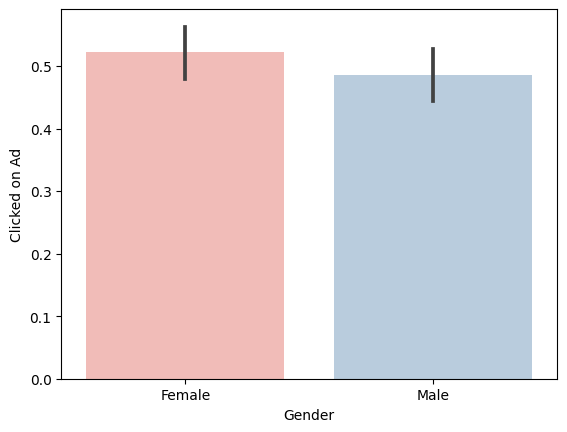

In [9]:
sns.barplot(x='Gender',y='Clicked on Ad',data=df,palette='Pastel1')

In [10]:
a=df.sort_values(by='Daily Time Spent on Site',ascending=False).head()[['Age','Daily Time Spent on Site']].reset_index()
a

,index,Age,Daily Time Spent on Site
0,536,39.0,91.43
1,866,45.0,91.37
2,935,38.0,91.15
3,640,40.0,91.10
4,323,37.0,90.97


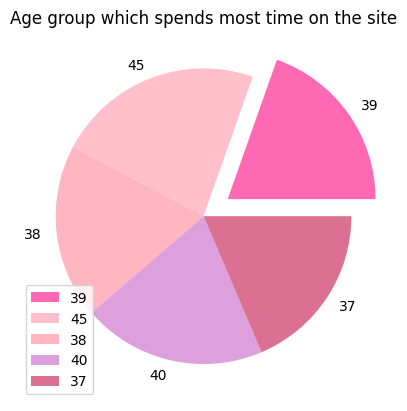

In [11]:
x=a['Age']
age=[39,45,38,40,37]
myexplode = [0.2, 0, 0, 0, 0]
mycolors = ["hotpink", "pink", "lightpink", "plum",'palevioletred']
plt.pie(x,labels=age,explode = myexplode,colors = mycolors)
plt.legend(loc='lower left')
plt.title('Age group which spends most time on the site')
plt.show()

In [12]:
b=df.sort_values(by='Daily Internet Usage',ascending=False).head()[['Country','Daily Internet Usage']]
b

,Country,Daily Internet Usage
248,Sierra Leone,269.96
30,Peru,267.01
854,Cayman Islands,261.52
369,Afghanistan,261.02
620,Guinea-Bissau,259.76


<Axes: xlabel='Daily Internet Usage', ylabel='Country'>

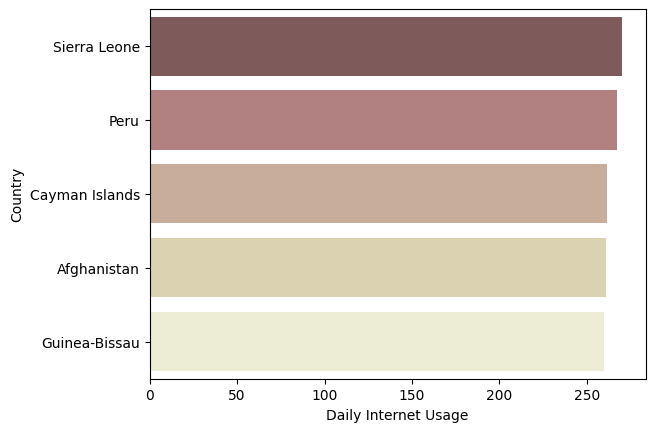

In [13]:
sns.barplot(x=b['Daily Internet Usage'],y=b['Country'],palette='pink')

In [14]:
c=df.sort_values(by='Daily Time Spent on Site',ascending=False).head(3)[['Gender','Daily Time Spent on Site']].reset_index()
c
index_to_drop = 1
c = c.drop(index=index_to_drop)

In [15]:
c

,index,Gender,Daily Time Spent on Site
0,536,Male,91.43
2,935,Female,91.15


<Axes: xlabel='Gender', ylabel='Daily Time Spent on Site'>

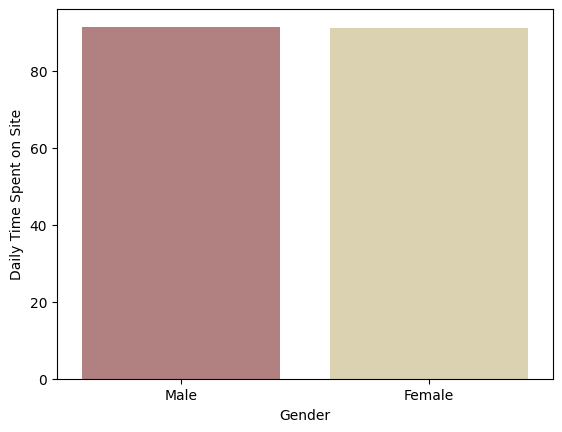

In [16]:
sns.barplot(x=c['Gender'],y=c['Daily Time Spent on Site'],palette='pink')

From Exploratory Data Analysis the following observations have been made


*   Out of the two genders,**females** have clicked more number of advertisments
*   people in the age group **35 to 40** have spent more time on the site.


*   **Sierra Leone** is the country with most number of internet usages followed by 
    peru, cayman islands and Afghanisthan
*   **Males** spend most time on the site than females




**Model Building**

In [17]:
df.drop(['Ad Topic Line','City','Country','Timestamp'],axis=1,inplace=True)

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad
0,68.95,35.0,61833.90,256.09,0,0
2,69.47,26.0,59785.94,236.50,0,0
3,74.15,29.0,54806.18,245.89,1,0
4,68.37,35.0,73889.99,225.58,0,0
6,88.91,33.0,53852.85,208.36,0,0
...,...,...,...,...,...,...
1004,72.97,30.0,71384.57,208.58,1,1
1005,51.30,45.0,67782.17,134.42,1,1
1006,51.63,51.0,42415.72,120.37,1,1
1007,55.55,19.0,41920.79,187.95,0,0


In [19]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [20]:
#scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
X_sc=ms.fit_transform(X)
X_sc

array([[0.61788203, 0.38095238, 0.73047247, 0.916031  , 0.        ],
       [0.62672106, 0.16666667, 0.69920032, 0.7974331 , 0.        ],
       [0.70627231, 0.23809524, 0.62315986, 0.85428018, 1.        ],
       ...,
       [0.32347442, 0.76190476, 0.43395874, 0.09438189, 1.        ],
       [0.39010709, 0.        , 0.4264012 , 0.50351132, 0.        ],
       [0.2109468 , 0.16666667, 0.24247537, 0.4453929 , 0.        ]])

In [21]:
#splitting the dataset to train data and test data
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.2,random_state=1)

In [22]:
#Using KNN model
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier(n_neighbors=5)
Knn.fit(X_train,y_train)

KNeighborsClassifier()

In [23]:
#prediction
y_pred=Knn.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [24]:
y_test.values

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1])

              precision    recall  f1-score   support

           0       0.88      0.99      0.93        87
           1       0.99      0.89      0.93       105

    accuracy                           0.93       192
   macro avg       0.93      0.94      0.93       192
weighted avg       0.94      0.93      0.93       192



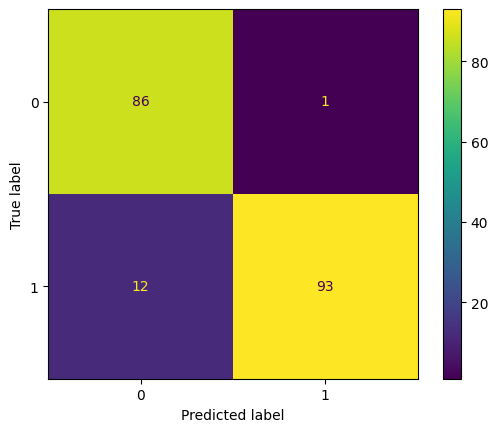

In [25]:
#model validation
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [26]:
#Using Support vector Machine
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,y_train)
y_pred1=sv.predict(X_test)
y_pred1

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1])

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        87
           1       0.97      0.92      0.95       105

    accuracy                           0.94       192
   macro avg       0.94      0.94      0.94       192
weighted avg       0.94      0.94      0.94       192



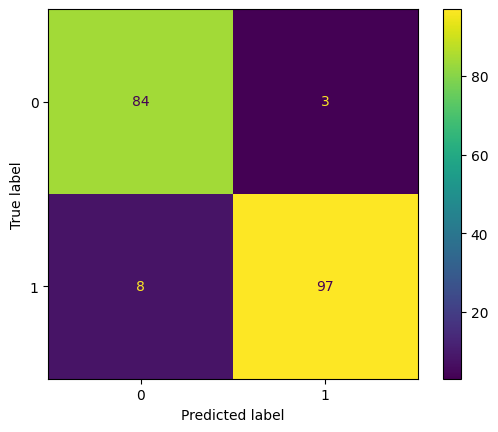

In [31]:
print(classification_report(y_test,y_pred1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred1))

In [28]:
#Using Naive-Bayes 
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred2=nb.predict(X_test)
y_pred2

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1])

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        87
           1       0.98      0.95      0.97       105

    accuracy                           0.96       192
   macro avg       0.96      0.96      0.96       192
weighted avg       0.96      0.96      0.96       192



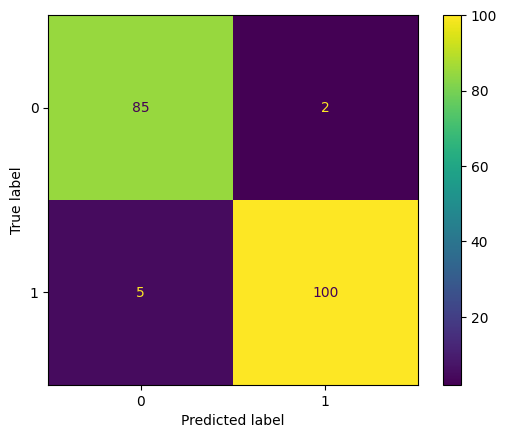

In [30]:
print(classification_report(y_test,y_pred2))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred2))

In [33]:
import warnings
warnings.filterwarnings('ignore')
y_new=nb.predict(ms.transform([[69.34,45,50000,100.5,0]]))
if y_new==0:
  print('Did not click the advertisment')
else:
  print('clicked the advertisment')

clicked the advertisment


After model building using three algorithms Knn,SVM and Naive bayes algorithms we can see that the accuracy of **Naive bayes** algorithm is more with an accuracy of **96%** followed by **SVM** with an accuracy of **94%** and **Knn** with an accuracy of **93%**.

After making predictions using **Naive bayes** with values [69.34,45,50000,100.5,0]
we can see that the person has **clicked the advertisment**